In [65]:
import numpy as np
import matplotlib.pyplot as plt
from surprise import SVD, NormalPredictor, KNNBasic, NMF
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms.matrix_factorization import SVDpp
from surprise import Dataset
from surprise.model_selection import cross_validate

In [29]:
data = Dataset.load_builtin('ml-100k')

Normal Predictor

In [30]:
trainSet = data.build_full_trainset()

normal_predictor = NormalPredictor()

normal_predictor_result = cross_validate(normal_predictor, data, measures=['RMSE', 'MAE'], cv=5)

SVD (cache_ratings=True)

In [32]:
svd_pp_1 = SVDpp(cache_ratings=True)

svd_pp_1_result = cross_validate(svd_pp_1, data, measures=['RMSE', 'MAE'], cv=5)

SVD (cache_ratings=False)

In [33]:
svd_pp_2 = SVDpp(cache_ratings=False)

svd_pp_2_result = cross_validate(svd_pp_2, data, measures=['RMSE', 'MAE'], cv=5)

KNN

In [34]:
sim_options = {'name': 'cosine', 'user_based': False}

knn = KNNBasic(sim_options=sim_options)

knn_result = cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


NMF

In [35]:
model = NMF()

nmf_result = cv_results = cross_validate(model, data, measures=['RMSE'], cv=5)

GridSearchCV + SVD

In [36]:
param_grid = {'n_factors': [10, 15, 20, 50, 100],
              'n_epochs': [20,25,30, 50, 60],
              'lr_all':[0.005,0.01,0.1],
              'reg_all':[0.02,0.05,0.1]}
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)
grid_search.fit(data)

In [37]:
algo = grid_search.best_estimator['rmse']

grid_search_result = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5)

Comparison

In [86]:
results = {'normal predictor': normal_predictor_result, 'svd++ 1': svd_pp_1_result, 'svd++ 2': svd_pp_2_result, 'knn': knn_result, 'grid_search + svd': grid_search_result}
mae = {model: np.mean(results[model]['test_mae']) for model in results}
results.update({'nmf': nmf_result})
rmse = {model: np.mean(results[model]['test_rmse']) for model in results}



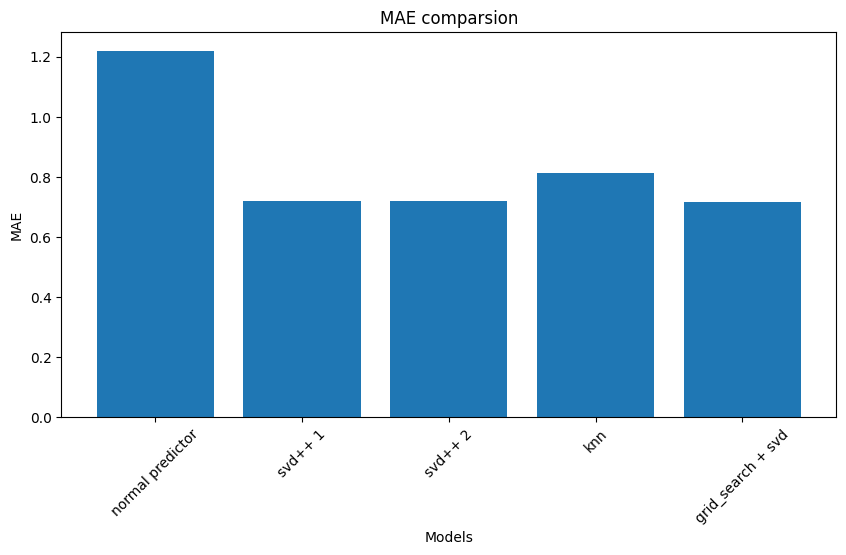

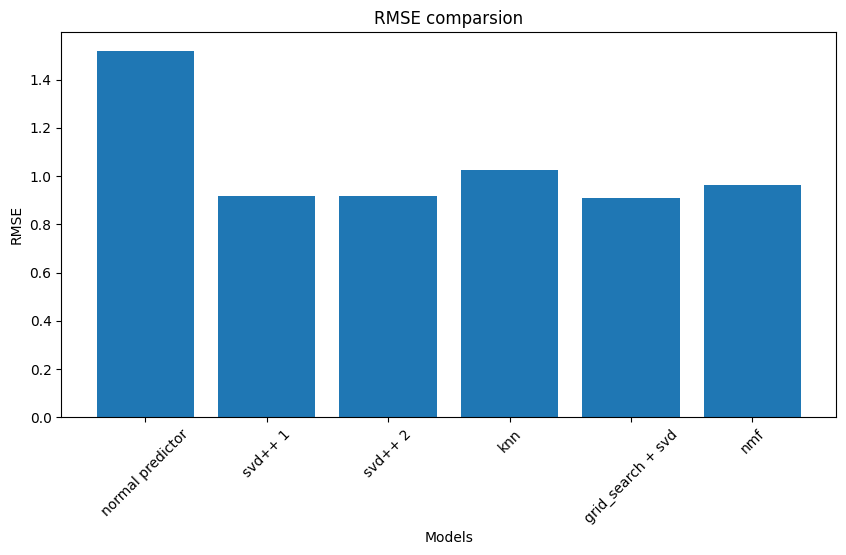

In [91]:
mae_labels = list(mae.keys())
mae_values = list(mae.values())

rmse_labels = list(rmse.keys())
rmse_values = list(rmse.values())

plt.figure(figsize=(10, 5))
plt.bar(mae_labels, mae_values)
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE comparsion')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(rmse_labels, rmse_values)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE comparsion')
plt.xticks(rotation=45)
plt.show()